In [62]:
import numpy as np
import scipy.interpolate
from scipy import constants
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('text', usetex=True)
from mpmath import hyp2f1, factorial, gamma
import functools
fsc = constants.alpha   
aB_in_cm = constants.value('Bohr radius') * 1e2
Ry_in_erg = constants.value('Rydberg constant times hc in J') * 1.e7 #in ergs
kb = constants.k * 1e7
h = constants.value('Planck constant') * 1e7 #in ergs s
c = constants.c * 1.e2 # in cm/s
e_e = 4.80320451e-10 #in statcoulomb
m_e = constants.electron_mass * 1e3 # in g

In [63]:
nu_table=(10**14)*np.array([1E-26,1.23,2.47,3.70,4.93,6.17,7.40,8.64,9.87,11.10,12.34]) #10^14 Hz
nug_nu=(10**-12)*np.array([0,0.0373,0.242,0.679,1.37,2.33,3.55,5.01,6.69,8.59,10.6])

g_nu=nug_nu/nu_table

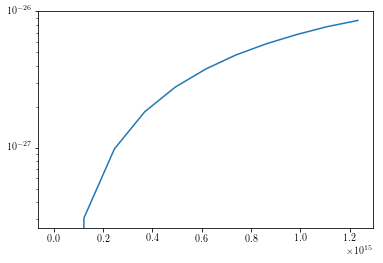

In [64]:
plt.semilogy(nu_table,g_nu)

In [65]:
nu_12=2*1.234E15

In [73]:
#Interpolate points on table.
gnu_interp=scipy.interpolate.interp1d(nu_table,g_nu,kind='cubic')

In [74]:
alpha_eff=0.838E-13 #cm^3 * s^-1
A_2= 8.23 #s^-1
q_p=2.51E-4 + 2.23E-4 #cm^3 * s^-1
q_e=0.22E-4 + 0.35E-4 #cm^3 * s^-1

In [75]:
def gamma_nu(nu_arr, n_p, n_e):
    gammas=[]
    denom=1+((n_p*q_p+n_e*q_p)/A_2)
    for nu in nu_arr:
        if nu <= nu_12/2:
            g_nu=gnu_interp(nu)
            gammas.append((alpha_eff)*g_nu/denom)
        elif nu > nu_12/2:
            g_nu2=(nu/(nu_12-nu))*gnu_interp(nu_12-nu)
            gammas.append((alpha_eff)*g_nu2/denom)
    return gammas

In [78]:
nu_arr=np.logspace(np.log10(1.23E14),np.log10(2.465e15),200)
gamma_nu_arr=gamma_nu(nu_arr,0,0)

Text(0.5,0,'Wavelength (micron)')

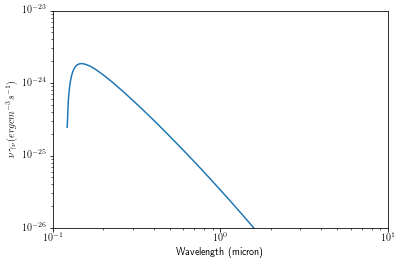

In [79]:
plt.loglog(3E14/np.logspace(np.log10(1.23e14),np.log10(2.465e15),200), nu_arr*gamma_nu_arr)
plt.ylabel(r'$\nu \gamma_{\nu} (erg cm^{-3}s^{-1})$')
plt.ylim(1e-26,1e-23)
plt.xlim(0.1,10)
plt.xlabel('Wavelength (micron)')

In [51]:
nu_arr2=np.logspace(np.log10(3E14),np.log10(10e14),200)
gamma_nu_arr2=gamma_nu(nu_arr2,0,0)

In [53]:
3E14/np.logspace(np.log10(1.23e14),np.log10(2.44e15),10)

array([2.43902439, 1.75005289, 1.2557009 , 0.90099263, 0.64648175,
       0.46386468, 0.33283296, 0.23881487, 0.17135485, 0.12295082])

In [58]:
0.838E-13*gnu_interp(6.17E14)

3.1645705024311184e-40

In [55]:
0.9/4

0.225

In [45]:
denom=1+((1*q_p+1*q_p)/A_2)

In [59]:
0.838E-13*3.78E-27

3.16764e-40